In [1]:
# Import necessary libraries
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

We will use the Breast Cancer dataset which is a built-in dataset in scikit-learn.
It is a binary classification problem where the task is to predict whether a tumor is malignant or benign.

In [2]:
data = load_breast_cancer()
X, y = data.data, data.target


The data is split into training and testing sets to evaluate the performance of our model later.

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


We create a pipeline with data scaling, PCA for dimensionality reduction to 10 components, 
followed by Logistic Regression for classification.

In [4]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=10, random_state=42)),
    ('classifier', LogisticRegression(random_state=42))
])

In [5]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('pca', PCA(n_components=10, random_state=42)),
                ('classifier', LogisticRegression(random_state=42))])

For visualization, we create another pipeline with data scaling, PCA, and then t-SNE for 2D visualization.
This will allow us to see how well the transformations separate the data.

In [12]:
visual_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=2, random_state=42)),
    ('tsne', TSNE(n_components=2, random_state=42))
])

We plot the 2D projection of the testing data after going through the PCA and t-SNE transformations.
The color of the points corresponds to the true labels, helping to visualize the separation of classes.

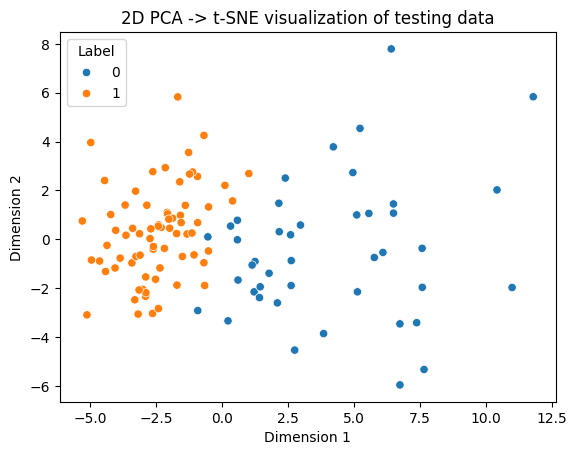

In [11]:
X_test_transformed = visual_pipeline.fit_transform(X_test)

import pandas as pd
import seaborn as sns

data_viz = pd.DataFrame(X_test_transformed, columns=['Dimension 1', 'Dimension 2'])
data_viz['Label'] = y_test

# We use sns.scatterplot to create a scatter plot where the color of the points is determined by the labels in y_test.
sns.scatterplot(data=data_viz, x='Dimension 1', y='Dimension 2', hue='Label')
plt.title('2D PCA -> t-SNE visualization of testing data')
plt.show()